<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-asosam91/blob/master/MCA_SistDist_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adrián Sosa Medellín
## MCA 2018-2020

### Configuracion inicial

In [0]:
import os, time, psutil, gc
import pandas as pd 


In [12]:
gc.enable()
# Ejecuta esta celda para activar Google Drive.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd /content/drive/"My Drive"/"Colab Notebooks"/Data

/content/drive/My Drive/Colab Notebooks/Data


### definicion de funciones

In [0]:
# esta funcion fue proporcionada por el Dr. Horacio Tapia
def memoryPrint():
  '''Regresa al memoria usada por un proceso en python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem/1024**2)

In [0]:
class data():
  def __init__(self):
    self.name = ""
    self.rows = 0
    self.cols = 0
    self.readtime = 0
    self.memoryprint = 0 
    self.memory = 0
    self.empyreg = 0
    self.newcols = 0
    self.newrows = 0
    self.timemean = 0

### descarga y descompresion de la 'Base de datos'

In [0]:
nombre = 'trip_data_{:d}.csv'
plantilla = [nombre.format(i) for i in range(1, 13)]

In [0]:
# if not os.path.exists('trip_data.7z'):
#   comando = "wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z"
#   os.system(comando)

# !7z x trip_data.7z

## PANDAS



Se responden las siguientes preguntas:

 - Cuantas columnas contiene cada archivo de datos descomprimido.
 
 -  Cuantos renglones tiene cada archivo.
 
- Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:



> -  indicar claramente cuantos son los renglones con errores y a que archivos corresponden.

> - crear un nuevo conjunto de datos con los errores eliminados.

* Crear un DataFrame usando la libreria pandas y responder lo siguiente:

> - Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un  DataFrame.

> - Cual es la huella de memoria del proceso usado para generar el objeto DataFrame.

> - Cuanta memoria del sistema se usa para crear el objeto anterior.

> - Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance).

In [0]:
resultados = []
# no ejecutar esta instruccion a menos que sea necesario
# for i in plantilla:
#   comando = "rm new_"+ i
#   os.system(comando)

In [0]:
for archivo in plantilla:
  nombre = archivo +"_new"
  if not os.path.exists(nombre):
    dat = data()
    m1 = memoryPrint()
    t1 = time.time()
    try:
      df = pd.read_csv(archivo, usecols=["medallion",  "pickup_datetime", "dropoff_datetime", "passenger_count", "trip_time_in_secs", "trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])
    except :
      pass
    try:
      df = pd.read_csv(archivo, usecols=["medallion",  " pickup_datetime", " dropoff_datetime", " passenger_count", " trip_time_in_secs", " trip_distance", " pickup_longitude", " pickup_latitude", " dropoff_longitude", " dropoff_latitude"])
    except :
      pass
    t2 = time.time()
    m2 = memoryPrint()
    dat.name = archivo
    dat.readtime = (t2 - t1)*1000
    dat.memoryprint = m2 - m1
    dat.memory = df.memory_usage().sum()
    shapes = df.shape
    dat.rows = shapes[0]
    dat.cols = shapes[1]
      
    ## //// ---- Limpieza de datos ---- //// ##
    df = df.rename(columns=lambda x: x.strip())
    dat.empyreg = df.isna().sum()
    df = df.dropna()
    # la siguiente funcion es aportacion de Daniel Hdz.
    df = df.drop(df[df.passenger_count > 9].index)
    shapes = df.shape
    dat.newrows = shapes[0]
    dat.newcols = shapes[1]
    
    t1 = time.time()
    mean = df["trip_distance"].mean()
    t2 = time.time()
    dat.timemean = (t2 - t1)*1000
    df.to_csv(nombre)
    resultados.append(dat)
    df = ''
    dat = ''

In [0]:
# muestro el resultado de las operaciones
print("Resultados de las operaciones con PANDAS")

for i in range(len(resultados)):
  print("\n")
  print("Archivo analizado: {}".format(resultados[i].name))
  print("El archivo tiene {} columnas y {} renglones".format(resultados[i].cols, resultados[i].rows))
  print("Numero de registros vacios:\n{}".format(resultados[i].empyreg))
  print("--- se crea un nuevo conjunto de datos con los errores eliminados si los hay. ---")
  print("El nuevo conjunto de datos tiene {} columnas y {} renglones".format(resultados[i].newcols, resultados[i].newrows))
  print("Tiempo de lectura del archivo {}: {} ms".format(resultados[i].name, resultados[i].readtime))
  print("Huella de memoria del archivo: {:.2f} Mb".format(resultados[i].memoryprint))
  print("Memoria del sistema usada para crear el archivo: {:.2f} Mb".format((resultados[i].memory)/(1024**2)))
  print("Tiempo que tarda pandas en obtener el promedio de Trip_distance: {} ms".format(resultados[i].timemean))
  print("-----------------------------------------------------------------------------------------")
  

Resultados de las operaciones con PANDAS


Archivo analizado: trip_data_1.csv
El archivo tiene 10 columnas y 14776615 renglones
Numero de registros vacios:
medallion             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_time_in_secs     0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    86
dropoff_latitude     86
dtype: int64
--- se crea un nuevo conjunto de datos con los errores eliminados si los hay. ---
El nuevo conjunto de datos tiene 10 columnas y 14776527 renglones
Tiempo de lectura del archivo trip_data_1.csv: 70025.25401115417 ms
Huella de memoria del archivo: 3195.49 Mb
Memoria del sistema usada para crear el archivo: 1127.37 Mb
Tiempo que tarda pandas en obtener el promedio de Trip_distance: 26.94225311279297 ms
-----------------------------------------------------------------------------------------


Archivo analizado: trip_data_2.csv
El archivo tiene 10 columnas y 13990176 renglones
Numero de 

## DASK

In [0]:
import dask
import dask.dataframe as dd

### Punto 6

#### Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)


In [0]:
df = dd.read_csv("new_trip_data_*.csv", usecols= ["trip_distance","trip_time_in_secs"])

In [0]:
promedio = df["trip_distance"].mean()

In [0]:
t1 = time.time()
pDist = promedio.compute()
t2 = time.time()

print("El tiempo que tarda DASK en calcular el promedio de trip_distance es: {:.2f} ms".format((t2 - t1)*1000))

El tiempo que tarda DASK en calcular el promedio de trip_distance es: 1001424.32 ms


#### Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)

In [0]:
promedio = df["trip_time_in_secs"].mean()

In [0]:
t1 = time.time()
pTime = promedio.compute()
t2 = time.time()

print("El tiempo que tarda DASK en calcular el promedio de trip_time_in_secs es: {:.2f} ms".format((t2 - t1)*1000))

El tiempo que tarda DASK en calcular el promedio de trip_time_in_secs es: 1027340.30 ms


####  calcular el tiempo de recorrido en segundos

- Con las columnas pickup_datetime y dropoff_datetime como objetos temporales.
- Crear una nueva columna en los dataframes que se llame duracion.
- Compararla renglon a renglon con la columna trip_time_in_secs

In [0]:
df = dd.read_csv("new_trip_data_*.csv", usecols= ["pickup_datetime", "dropoff_datetime", "trip_time_in_secs"])

In [0]:
df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
df["duracion"] = df["dropoff_datetime"] - df["pickup_datetime"]
df["duracion"] = df["duracion"].dt.total_seconds()

In [0]:
df["diferencia"] = df["duracion"] - df["trip_time_in_secs"]

In [0]:
dif = df["diferencia"].value_counts()

In [24]:
print("hay {} registros donde la duracion calculada y la registrada no coinciden.".format(dif.compute()))

hay 173176305 registros donde la duracion calculada y la registrada no coinciden.


#### Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 minutos.

In [25]:
longTrip = df[(df["duracion"] > 1200)]
print("hay {} viajes largos en total.".format(longTrip.shape[0]))

hay 26633265 viajes largos en total.


### Punto 7

#### Contar el numero de viajes largos en cada archivo.

In [0]:
nombre = 'new_trip_data_{}.csv'
files= [nombre.format(i) for i in range(1, 13)]

In [31]:
for file in files:
  df = dd.read_csv(file, usecols=["pickup_datetime", "dropoff_datetime"])
  df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["duracion"] = df["dropoff_datetime"] - df["pickup_datetime"]
  df["duracion"] = df["duracion"].dt.total_seconds()
  longTrip = df[(df["duracion"] > 1200)]
  print("El archivo {} tiene {} viajes largos".format(file, longTrip.compute().shape[0]))

El archivo new_trip_data_1.csv tiene 1718917 viajes largos
El archivo new_trip_data_2.csv tiene 1772181 viajes largos
El archivo new_trip_data_3.csv tiene 2117687 viajes largos
El archivo new_trip_data_4.csv tiene 2260489 viajes largos
El archivo new_trip_data_5.csv tiene 2566543 viajes largos
El archivo new_trip_data_6.csv tiene 2411108 viajes largos
El archivo new_trip_data_7.csv tiene 2086905 viajes largos
El archivo new_trip_data_8.csv tiene 1922569 viajes largos
El archivo new_trip_data_9.csv tiene 2421306 viajes largos
El archivo new_trip_data_10.csv tiene 2549062 viajes largos
El archivo new_trip_data_11.csv tiene 2374577 viajes largos
El archivo new_trip_data_12.csv tiene 2431921 viajes largos


### Punto 8

#### De los viajes largos.
- identificar el numero de taxis diferentes (la columna medallion contiene un numeroque identificada a cada uno de los vehiculos).
- Que vehiculos son los que mas viajes realizan en cada mes? 
- Son el mismo vehiculo?

In [0]:
nombre = 'new_trip_data_{}.csv'
files= [nombre.format(i) for i in range(1, 13)]
bestaxis = []

In [69]:
for file in files:
  df = dd.read_csv(file, usecols=["medallion", "pickup_datetime", "dropoff_datetime"])
  df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["duracion"] = df["dropoff_datetime"] - df["pickup_datetime"]
  df["duracion"] = df["duracion"].dt.total_seconds()
  longTrip = df[(df["duracion"] > 1200)]
  # la siguiente funcion es aportacion de Daniel Hdz.
  temp=df['medallion'].value_counts().compute()
  taxs = temp.shape[0]
  bestaxis.append(temp.index[0])
  print("El archivo {} tiene {} taxis diferentes.".format(file, taxs))
  print("top 10 de taxis con viajes largos:")
  print(temp[:10])
  print("\nTaxi que mas viajes realizan cada mes: \n {}".format(temp.index[0]))
  print("/// --------------------------------------------------------------------- ///")

for i in bestaxis:
  print(i)
  
  

El archivo new_trip_data_1.csv tiene 13425 taxis diferentes.
top 10 de taxis con viajes largos:
7E1346F23960CC18D7D129FA28B63A75    2137
6FFCF7A4F34BA44239636028E680E438    2112
A979CDA04CFB8BA3D3ACBA7E8D7F0661    2039
D5C7CD37EA4D372D00F0A681CDC93F11    1959
849E486825860106403FB991A763BCC3    1957
6FE6DFF9A59C0B64BE0CA64EE2699F08    1941
06C961EBE7EF4D13F3AE6C005EE0F501    1893
22908753E00888CC219C875C8D5BC4F6    1886
E6101A0F85312C49A5B5950E61D284DC    1882
6403BF98E4618E21C795C3B45A636D77    1882
Name: medallion, dtype: int64

Taxi que mas viajes realizan cada mes: 
 7E1346F23960CC18D7D129FA28B63A75
/// --------------------------------------------------------------------- ///
El archivo new_trip_data_2.csv tiene 13414 taxis diferentes.
top 10 de taxis con viajes largos:
0C9C589C0AD57ECCB633CB90A33DC37A    1953
6FE6DFF9A59C0B64BE0CA64EE2699F08    1940
DB51F659A90E9457DD2A2F4D5A2A3186    1936
19E063791B0DF5A558B8488180DDAB67    1935
02E517E0C958416296416C6F4CDABB33    1870
8DEB70907D

### Punto 9

#### Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. 

Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?

In [0]:
import matplotlib.pyplot as plt

In [0]:
nombre = 'new_trip_data_{}.csv'
files= [nombre.format(i) for i in range(1, 13)]

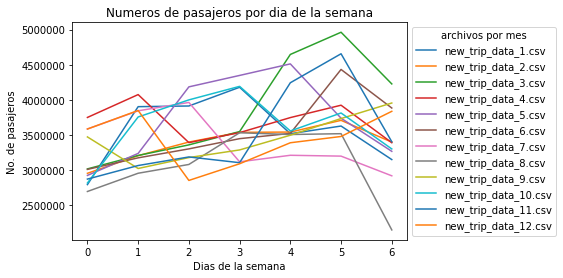

In [55]:
for file in files:
  df = dd.read_csv(file, usecols=["passenger_count", "dropoff_datetime"])
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["dia"] = df["dropoff_datetime"].dt.weekday
  dia = df.groupby("dia")
  sdia = dia["passenger_count"].sum()
  plt.plot(sdia.compute(), label= file)
  df =""
  dia=""
  sdia=""
plt.title("Numeros de pasajeros por dia de la semana")
plt.ylabel("No. de pasajeros")
plt.xlabel("Dias de la semana")
# la siguiente funcion es aportacion de Daniel Hdz.
plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

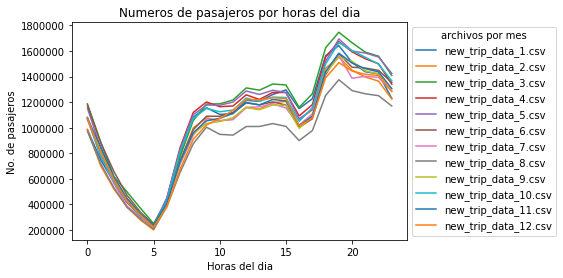

In [56]:
for file in files:
  df = dd.read_csv(file, usecols= ["passenger_count", "dropoff_datetime"])
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["hora"] = df["dropoff_datetime"].dt.hour
  hora = df.groupby("hora")
  shora = hora["passenger_count"].sum()
  plt.plot(shora.compute(), label= file)
  df =""
  dia=""
  sdia=""
plt.title("Numeros de pasajeros por horas del dia")
plt.ylabel("No. de pasajeros")
plt.xlabel("Horas del dia")
# la siguiente funcion es aportacion de Daniel Hdz.
plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Punto 10
- Elegir el vehiculo con mas viajes en cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por:

- dia de la semana (un color distinto para cada dia)

- hora del dia (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, etc.)

In [0]:
colores = ["red", "green", "blue", "gray", "pink", "orange"]
dias = ["Lunes", "Martes", "Miercoles", "jueves", "viernes","Sabado", "Domingo"]

In [72]:
!pip install pyproj

In [0]:
import pyproj
from pyproj import Proj, transform
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import STAMEN_TERRAIN

In [0]:
transformacion = lambda x, y: transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), x, y)

In [0]:
## ESTA CELDA DE CODIGO NOS LA PROPORCIONO EL DR. HORACIO EN LA CLASE 6
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

In [130]:
output_notebook()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
for j in range(1,13):
  taxi = bestaxis[j-1]
  df = dd.read_csv('new_trip_data_{}.csv'.format(j), usecols=["medallion", "pickup_datetime", "pickup_longitude", "pickup_latitude"])
  df = df[df["medallion"] == taxi]
  df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
  df["dia"] = df["pickup_datetime"].dt.dayofweek
  df = df.compute()
  df["pickup_longitude"], df["pickup_latitude"]= df.apply(lambda x: transformacion(x["pickup_longitude"], x["pickup_latitude"]), axis=1)
  dia = df.groupby("dia")
  for i in range(0,6):
    df = dia.get_group(i).sample(n=len(dia.get_group(i)))
    p.circle(x=df["pickup_longitude"], y=df["pickup_latitude"], legend=dias[i], fill_color=colores[i], line_color=None)
show(p)

Loading BokehJS ...

### Punto 11

Repetir para las posiciones donde se bajan los pasajeros para el mismo vehiculo.

In [132]:
output_notebook()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
for j in range(1,13):
  taxi = bestaxis[j-1]
  df = dd.read_csv('new_trip_data_{}.csv'.format(j), usecols=["medallion", "dropoff_datetime", "pickup_longitude", "pickup_latitude"])
  df = df[df["medallion"] == taxi]
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["dia"] = df["dropoff_datetime"].dt.dayofweek
  df = df.compute()
  df["pickup_longitude"], df["pickup_latitude"]= df.apply(lambda x: transformacion(x["pickup_longitude"], x["pickup_latitude"]), axis=1)
  dia = df.groupby("dia")
  for i in range(0,6):
    df = dia.get_group(i).sample(n=len(dia.get_group(i)))
    p.circle(x=df["pickup_longitude"], y=df["pickup_latitude"], legend=dias[i], fill_color=colores[i], line_color=None)
show(p)

Loading BokehJS ...